# **Trader Behavior vs Sentiment**

Information related to Data Sets:
1. **Bitcoin Market Sentiment Dataset**:
Columns: Date, Classification (Fear/Greed).
2.**Historical Trader Data from Hyperliquid**:
Columns: include: account, symbol, execution price, size, side, time,
start position, event, closedPnL, leverage, etc.



=>Bitcoin Market Sentiment Dataset:
1. **timestamp**: The date & time when the fear/greed score was recorded
1. **Date**:	The date of the market mood (like 2025-06-23)
2. **Classification**:	The type of mood: either Fear or Greed
3. **Value**:	A number showing how strong the fear or greed is (e.g., 80 = very greedy, 20 = scared)


=> Historical Trader Data from Hyperliquid Dataset:
1. **Account**:	Unique trader ID. Each row is a trade by this account.
2. **Coin**:	The crypto coin traded (e.g., BTC, ETH).                    
3. **Execution Price**: The price of 1 coin when the trade happened (like ₹
price of 1 mango).                              
4.  **Size Tokens**: How many coins the trader bought or sold (like 3 mangoes).                                            
5. **Size USD**: The total value of the trade in US dollars.                                                 
6. **Side**: Tells if the trader **bought** or **sold** the coin.                                        
7. **Timestamp IST**: The **date and time** when the trade happened.                                    
8. **Start Position**: How many coins the trader already had **before** this trade.                               
9. **Direction**: Might show if they expected price to go **up (long)** or **down (short)**.                          
10. **Closed PnL**: The **profit or loss** made from this trade. (e.g., +\$50 = profit, -\$30 = loss)             
11. **Fee**: The small amount the trader paid to do the trade.                                        
12. **Crossed**: If it is True, the trader accepted the current market price (like a market order).
If it is False, the trader placed a price and waited (like a limit order).

# **Objective:**

Our objective is to explore the relationship between trader performance and market sentiment, uncover hidden patterns, and deliver insights that can drive smarter trading strategies.


**Exploratory Data Analysis:**

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Loading the data

In [3]:
bitcoin_data = pd.read_csv("fear_greed_index.csv")
historical_data = pd.read_csv("historical_data.csv")

In [4]:
bitcoin_data.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Timestamp: here the timestamp is in unix timestamp also called as posixteimestamp. It represents the number of seconds since January 1, 1970 (called the Unix Epoch).

In [5]:
historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
historical_data.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
158618,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,19.110,338.88,6476.00,BUY,14-12-2024 05:59,25287.91585,Buy,0.0,0x828239d7cbe77fea2aaa04192be20b0201ec006afcdd...,5.529859e+10,False,0.016944,4.740000e+14,1.730000e+12
158619,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,19.817,39.00,772.86,BUY,14-12-2024 07:30,25626.77890,Buy,0.0,0x6a28aba46f2e8ce69b3b04192d35c0016b00fb4f17ee...,5.531747e+10,True,0.011700,3.600000e+14,1.730000e+12
158620,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,19.818,10.00,198.18,BUY,14-12-2024 07:30,25665.76720,Buy,0.0,0x6a28aba46f2e8ce69b3b04192d35c0016b00fb4f17ee...,5.531747e+10,True,0.003000,1.270000e+14,1.730000e+12
158621,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,19.820,562.62,11151.13,BUY,14-12-2024 07:30,25675.76420,Buy,0.0,0x6a28aba46f2e8ce69b3b04192d35c0016b00fb4f17ee...,5.531747e+10,True,0.168786,5.230000e+14,1.730000e+12
158622,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,19.821,30.00,594.63,BUY,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
historical_data.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [8]:
print(f"Shape of Bitcoin data {bitcoin_data.shape}")
print(f"Shape of Historical data {historical_data.shape}")

Shape of Bitcoin data (2644, 4)
Shape of Historical data (158623, 16)


In [9]:
#Information:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [10]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158623 entries, 0 to 158622
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           158623 non-null  object 
 1   Coin              158623 non-null  object 
 2   Execution Price   158623 non-null  float64
 3   Size Tokens       158623 non-null  float64
 4   Size USD          158623 non-null  float64
 5   Side              158623 non-null  object 
 6   Timestamp IST     158623 non-null  object 
 7   Start Position    158622 non-null  float64
 8   Direction         158622 non-null  object 
 9   Closed PnL        158622 non-null  float64
 10  Transaction Hash  158622 non-null  object 
 11  Order ID          158622 non-null  float64
 12  Crossed           158622 non-null  object 
 13  Fee               158622 non-null  float64
 14  Trade ID          158622 non-null  float64
 15  Timestamp         158622 non-null  float64
dtypes: float64(9), objec

In [11]:
#Statistical Description
bitcoin_data.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [12]:
historical_data.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,158623.000000,1.586230e+05,1.586230e+05,1.586220e+05,158622.000000,1.586220e+05,158622.000000,1.586220e+05,1.586220e+05
mean,14160.288877,5.929094e+03,6.349296e+03,-4.083973e+04,52.246903,6.760896e+10,1.302412,5.623929e+14,1.737058e+12
std,32290.268019,1.199006e+05,4.117309e+04,7.754831e+05,988.305986,1.984272e+10,7.472976,3.259165e+14,9.419049e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,2.549550,1.760175e+00,1.655350e+02,-2.606975e+02,0.000000,5.711114e+10,0.013702,2.800000e+14,1.730000e+12
50%,18.260000,3.000000e+01,5.687200e+02,3.106409e+01,0.000000,7.322909e+10,0.077664,5.620000e+14,1.740000e+12
75%,204.130000,2.218150e+02,2.068830e+03,7.604330e+03,6.193549,8.239097e+10,0.376371,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [13]:
## Null values in Bitcoin Market Sentiment Dataset
bitcoin_data.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [14]:
bitcoin_data["value"].unique()

array([30, 15, 40, 24, 11,  8, 36, 44, 54, 31, 42, 35, 55, 71, 67, 74, 63,
       39, 33, 37, 41, 38, 47, 56, 59, 32, 29, 28, 18, 12, 16, 22, 17, 19,
       20, 21, 23, 26, 25, 64, 61, 52, 62, 53, 27, 34, 43, 46, 49, 48, 14,
       13, 51,  9, 10, 65, 69, 58, 50, 57, 60, 68, 66, 76, 75, 78, 77, 70,
       73, 80, 84, 83, 82, 81, 87, 95, 92, 79, 72, 45,  5, 90, 88, 86, 89,
       91, 94, 93,  7,  6])

In [15]:
## Null values in  Historical Trader Data from Hyperliquid
historical_data.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,1
Direction,1
Closed PnL,1


Merging both the data sets on timestamp of Trader data and date of sentiment
data.   


our Concern:
“We're using machine learning or analysis to predict fear/greed... based on features (like trade size, side, PnL)...
but we assigned fear/greed just based on date — isn’t that kinda flawed?”

Yes — in a way, it’s a weak supervision approach.
We’re not measuring fear/greed directly, we’re:

❝ Labeling the entire day as "Fear" or "Greed"
and assuming every trade on that day happened under that sentiment. ❞

"We're building a model on something we already biased by force."

So... is it wrong?
Not exactly. It’s contextual labeling, which is very common when:

True labels are hard to know

But contextual influence is meaningful

Converting Timstamp into date of historical data that is in milisecond

In [16]:
#Firstly converting timestamp of historical data
historical_data['Timestamp'] = pd.to_datetime(historical_data['Timestamp'], unit='ms')

In [17]:
historical_data['date_1'] = pd.to_datetime(historical_data['Timestamp']).dt.date

Converting Timstamp into date of bitcoin data that is in second

In [18]:

bitcoin_data['timestamp'] = pd.to_datetime(bitcoin_data['timestamp'], unit='s')

In [19]:
bitcoin_data['date_1'] = pd.to_datetime(bitcoin_data['timestamp']).dt.date

Intersecting checking them up which matches

In [20]:
dates_historical = set(historical_data['date_1'].unique())
dates_bitcoin = set(bitcoin_data['date_1'].unique())


In [21]:
common_dates = dates_historical.intersection(dates_bitcoin)
print(common_dates)


{datetime.date(2023, 11, 14), datetime.date(2025, 2, 19), datetime.date(2024, 3, 9), datetime.date(2023, 3, 28), datetime.date(2024, 10, 27), datetime.date(2024, 7, 3)}


In [22]:
print(f"Number of common dates: {len(common_dates)}")


Number of common dates: 6


In [23]:
##Merging
df = pd.merge(historical_data, bitcoin_data, on='date_1', how='left')

In [24]:
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,date_1,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,5.201771e+10,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74.0,Greed,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,5.201771e+10,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74.0,Greed,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,5.201771e+10,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74.0,Greed,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,5.201771e+10,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74.0,Greed,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,5.201771e+10,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74.0,Greed,2024-10-27


In [25]:
##Dropping Columns that will be no useful
df.drop(["Timestamp","Transaction Hash","Order ID","Trade ID","timestamp" ],axis=1, inplace=True)

In [26]:
df = df.dropna(subset=['classification', 'value'])


**Analyzing:**

In [27]:
#Tells you if people make more profit during Fear or Greed days
df.groupby('classification')['Closed PnL'].mean()


,Closed PnL
classification,
Extreme Greed,25.418772
Fear,55.694656
Greed,82.587370
Neutral,22.245429


**Observation**(Insight):
Greed days are the most profitable for traders.

Fear days still give good profits, but less than Greed days.

Extreme Greed and Neutral days see much lower average profit.

This suggests traders may perform better when market sentiment is Greedy but not Extremely Greedy.

In [28]:
#Do people trade more money when greedy or when fearful
df.groupby('classification')['Size USD'].sum()


,Size USD
classification,
Extreme Greed,3.940677e+07
Fear,5.835621e+08
Greed,8.652298e+07
Neutral,2.181288e+07


**Observation:**
People trade much more money during Fear days (~ 704 million USD) than on Greed (~ 115 million) or Extreme Greed (~ 39 million) days.



In [29]:
#How many trades happened on each mood type?
df['classification'].value_counts()

,count
classification,
Fear,97055
Greed,27910
Neutral,7136
Extreme Greed,6962


Observation:
Fear days have the highest number of trades by a large margin.

Greed days have far fewer trades (about a quarter of Fear).

Neutral and Extreme Greed days see very low trading activity.

This suggests traders are most active when the market is fearful, possibly due to uncertainty or volatility.



# **Visualization:**

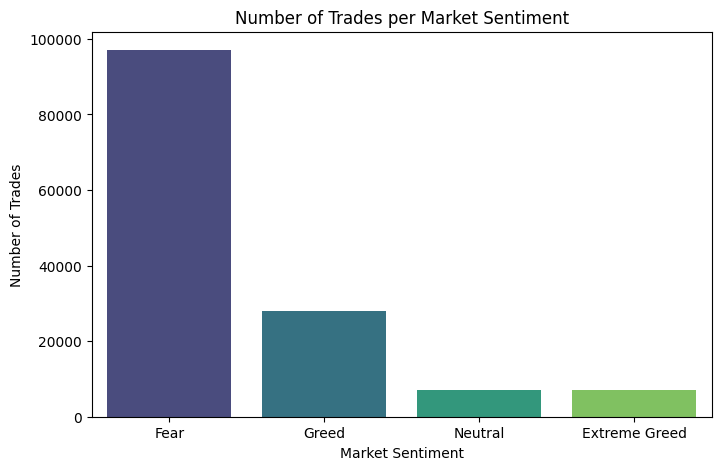

In [30]:

# Your counts
trade_counts = df['classification'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=trade_counts.index, y=trade_counts.values, palette='viridis')
plt.title('Number of Trades per Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.show()


Observation:
Number of Trading is most in Fear Days

In [31]:
trade_counts = df['classification'].value_counts().sort_values(ascending=False)

Coin_counts_top7 = df['Coin'].value_counts().head(7)
Direction_counts_top7 = df['Direction'].value_counts().head(7)
Crossed_counts = df['Crossed'].value_counts().sort_values(ascending=False)


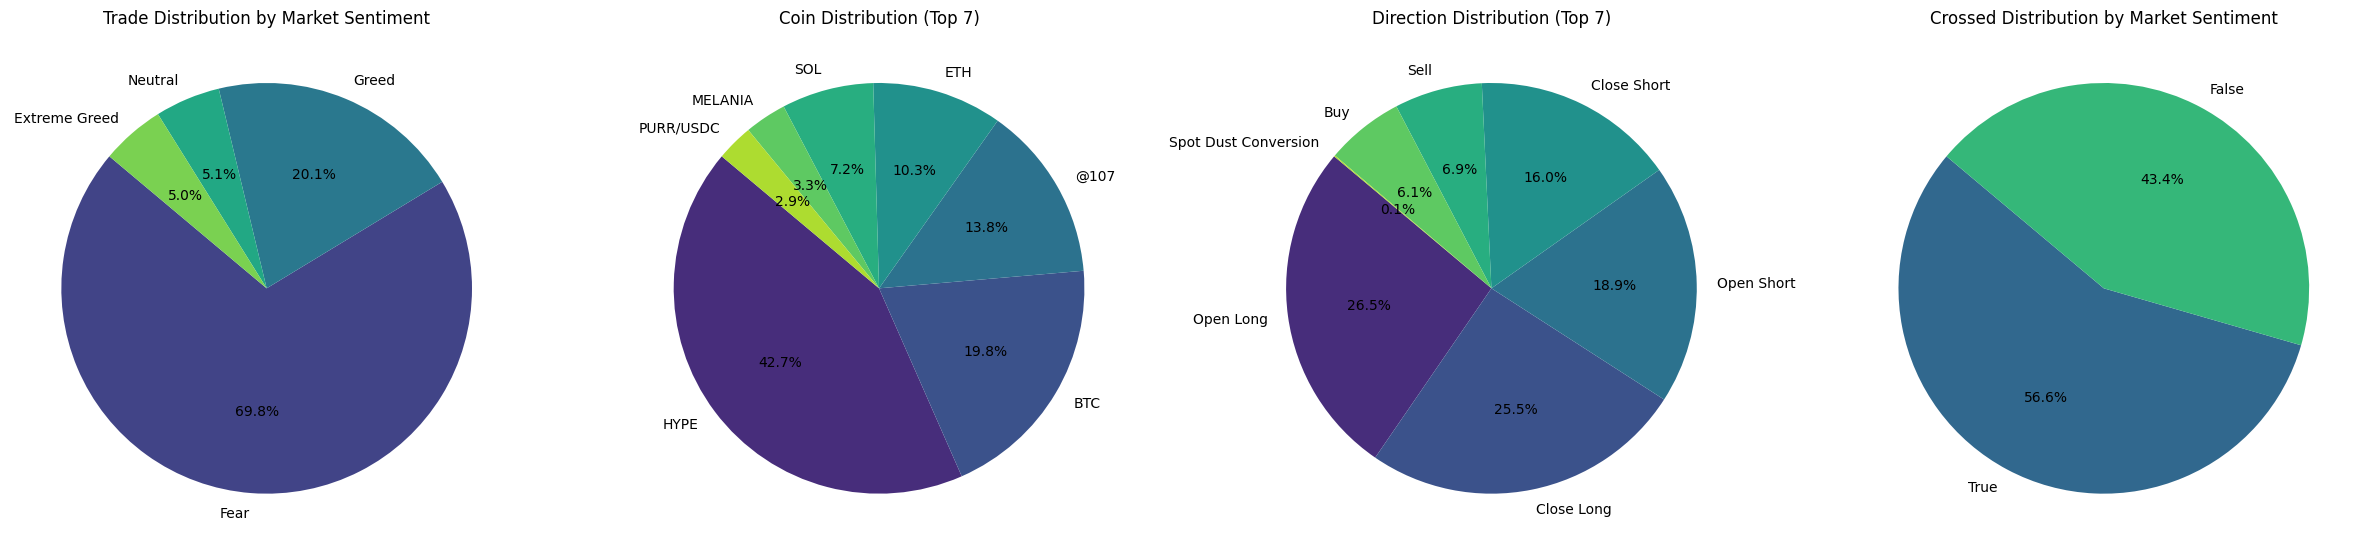

In [32]:
from matplotlib.pyplot import subplot

plt.figure(figsize=(24, 6))

plt.subplot(1, 4, 1)
plt.pie(trade_counts.values, labels=trade_counts.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette('viridis', len(trade_counts)))
plt.title('Trade Distribution by Market Sentiment')

plt.subplot(1, 4, 2)
plt.pie(Coin_counts_top7.values, labels=Coin_counts_top7.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette('viridis', len(Coin_counts_top7)))
plt.title('Coin Distribution (Top 7)')

plt.subplot(1, 4, 3)
plt.pie(Direction_counts_top7.values, labels=Direction_counts_top7.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette('viridis', len(Direction_counts_top7)))
plt.title('Direction Distribution (Top 7)')

plt.subplot(1, 4, 4)
plt.pie(Crossed_counts.values, labels=Crossed_counts.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette('viridis', len(Crossed_counts)))
plt.title('Crossed Distribution by Market Sentiment')

plt.tight_layout()
plt.show()


Observation:
1. Fear Days has most Trading
2. HYPE Coin is the most selling one.
3. People mostly choose Close Long and Open Long Distribution
4. Crossed Distribution is mostly True

Coin and Classification:

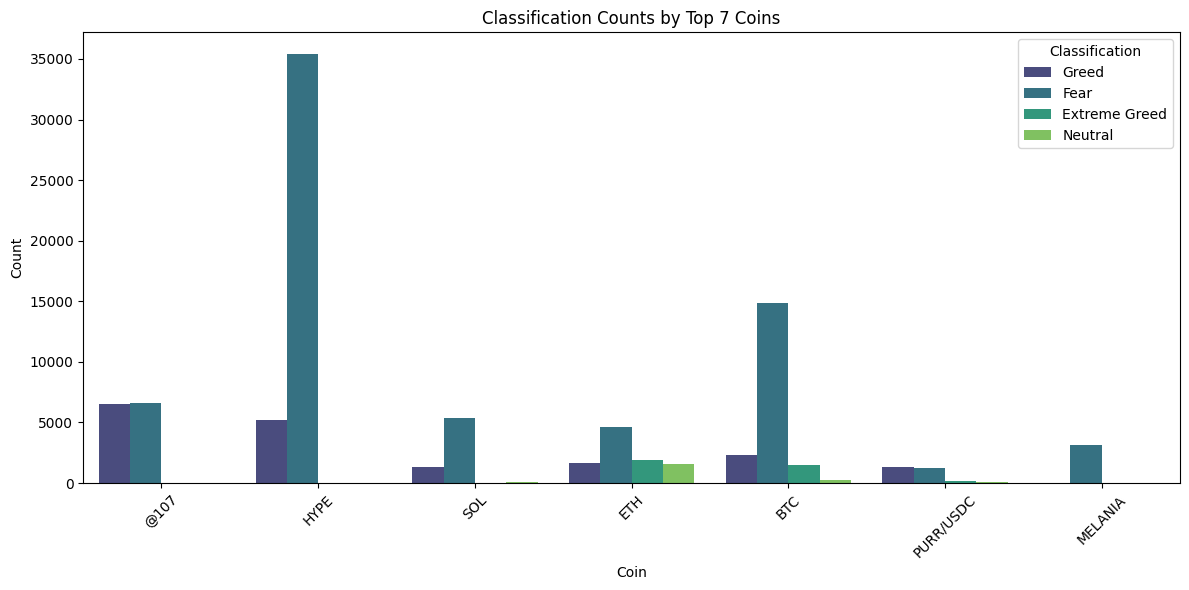

In [33]:
top7_coins = df['Coin'].value_counts().head(7).index
df_top7 = df[df['Coin'].isin(top7_coins)]
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top7, x='Coin', hue='classification', palette='viridis')
plt.title('Classification Counts by Top 7 Coins')
plt.xlabel('Coin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Classification')
plt.tight_layout()
plt.show()



Observation:
1. Hype is mostly traded in fear days
2. @107 is traded equally in fear and greed days
3. Rest of the assured is are inconsistent in every day and not assured.

Direction and Classification:

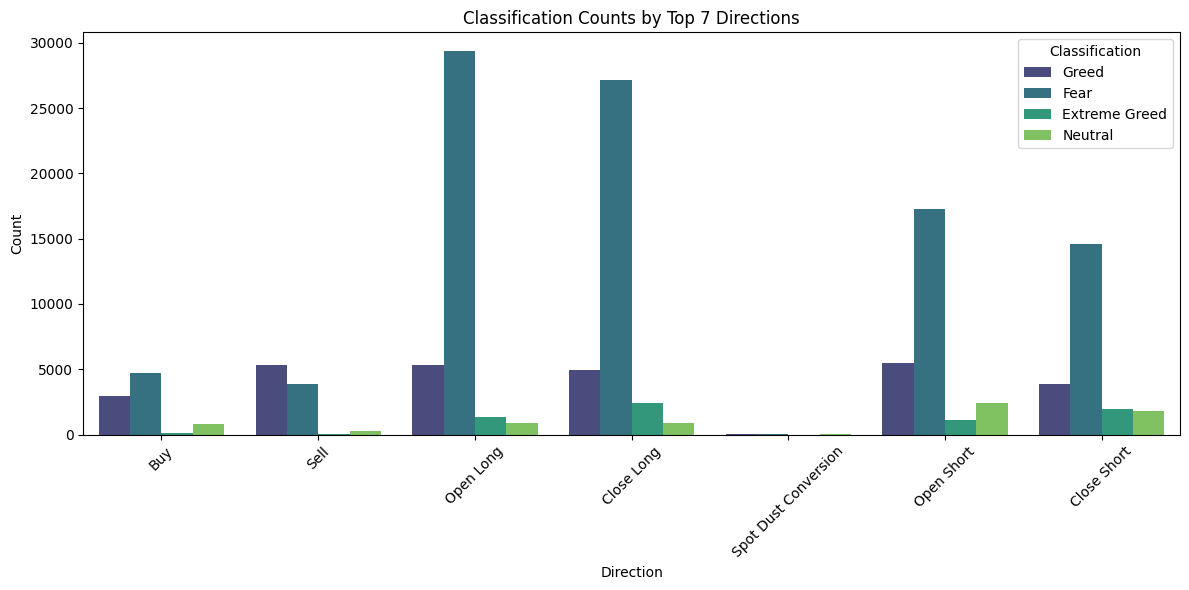

In [34]:
top7_directions = df['Direction'].value_counts().head(7).index
df_top7_direction = df[df['Direction'].isin(top7_directions)]
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top7_direction, x='Direction', hue='classification', palette='viridis')
plt.title('Classification Counts by Top 7 Directions')
plt.xlabel('Direction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Classification')
plt.tight_layout()
plt.show()


Observation:
1. As cited, Open and Close Long are mostly in fear days

In [35]:
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,date_1,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,True,0.345404,2024-10-27,74.0,Greed,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,True,0.005600,2024-10-27,74.0,Greed,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,True,0.050431,2024-10-27,74.0,Greed,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,True,0.050043,2024-10-27,74.0,Greed,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,True,0.003055,2024-10-27,74.0,Greed,2024-10-27


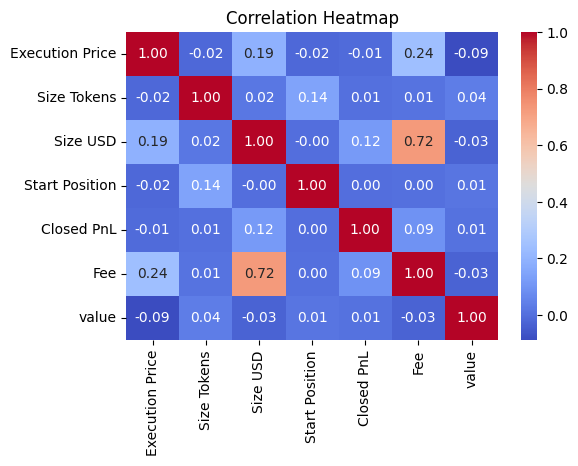

In [36]:

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Observation:
1. Fee and Size USD are correlated

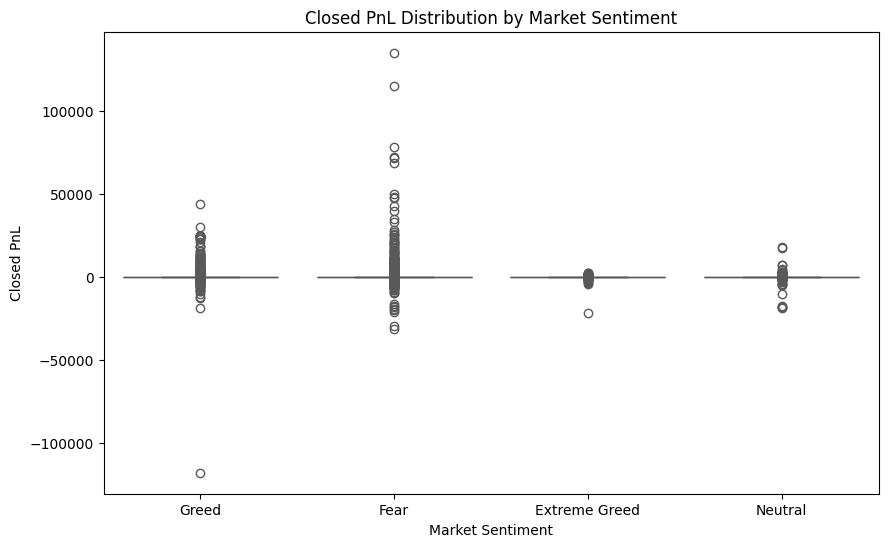

In [37]:
#Box PLot
plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Closed PnL', data=df, palette='Set2')
plt.title('Closed PnL Distribution by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.show()


Insights:
Most trades in all classifications have profit/loss near zero, but some trades in each class produce very large profits or losses. One class in particular shows many big outliers, suggesting it involves riskier or larger trades.

**Checking Distrubution of every Feature**

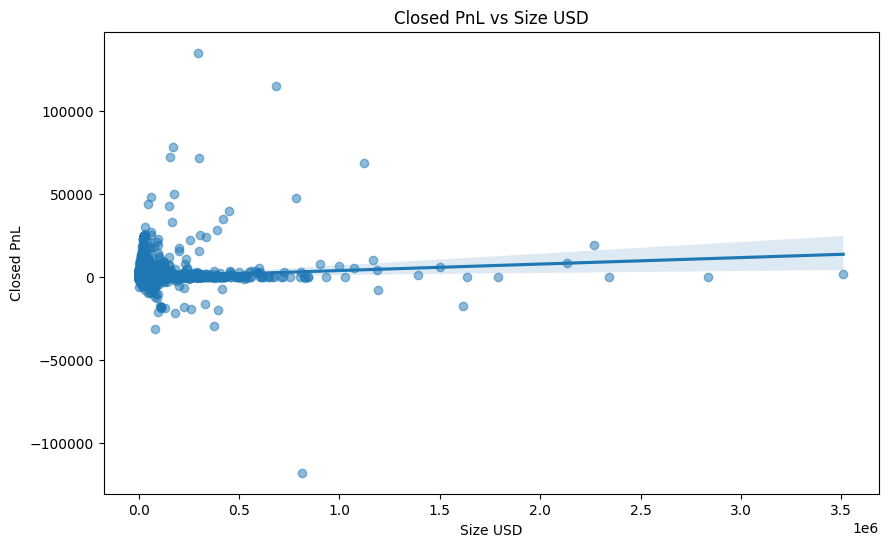

In [38]:
# Scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Size USD', y='Closed PnL', scatter_kws={'alpha':0.5})
plt.title('Closed PnL vs Size USD')
plt.xlabel('Size USD')
plt.ylabel('Closed PnL')
plt.show()

Observation:
1. Most points are clustered around small Size USD, near the origin.
2. There are a few huge outliers (big profits/losses).
3. The trend line is nearly flat → weak relationship overall.
4. But slightly upward → small positive correlation.

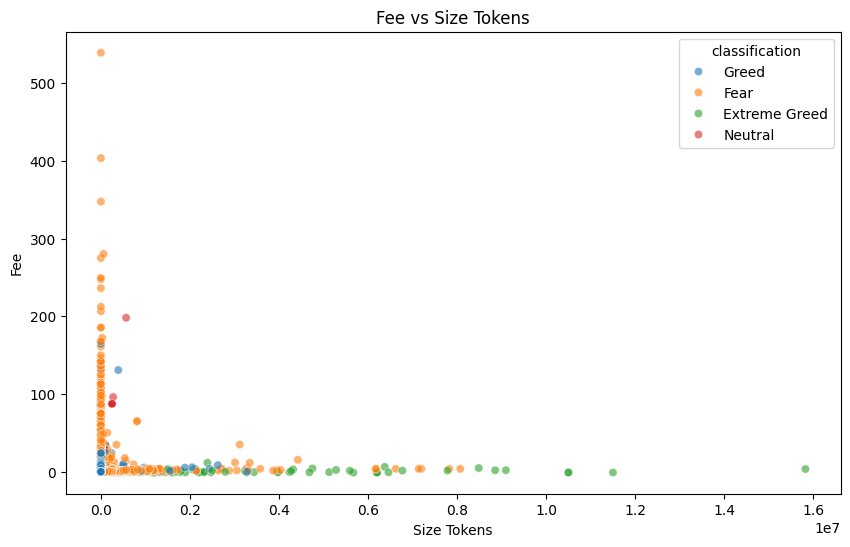

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Size Tokens', y='Fee', hue='classification', alpha=0.6)
plt.title('Fee vs Size Tokens')
plt.xlabel('Size Tokens')
plt.ylabel('Fee')
plt.show()


Most trades are small in size and pay low fees. A few trades (especially in the “Fear” classification) pay very large fees. Size Tokens and Fees are strongly concentrated near zero but with scattered large outliers. Classification categories show different patterns in their size/fee behavior.



In [47]:
num_negatives = (df['Closed PnL'] < 0).sum()
print(f"Number of negative Closed PnL entries: {num_negatives}")


Number of negative Closed PnL entries: 8122


That’s ~5.84% of all trades that lost money.

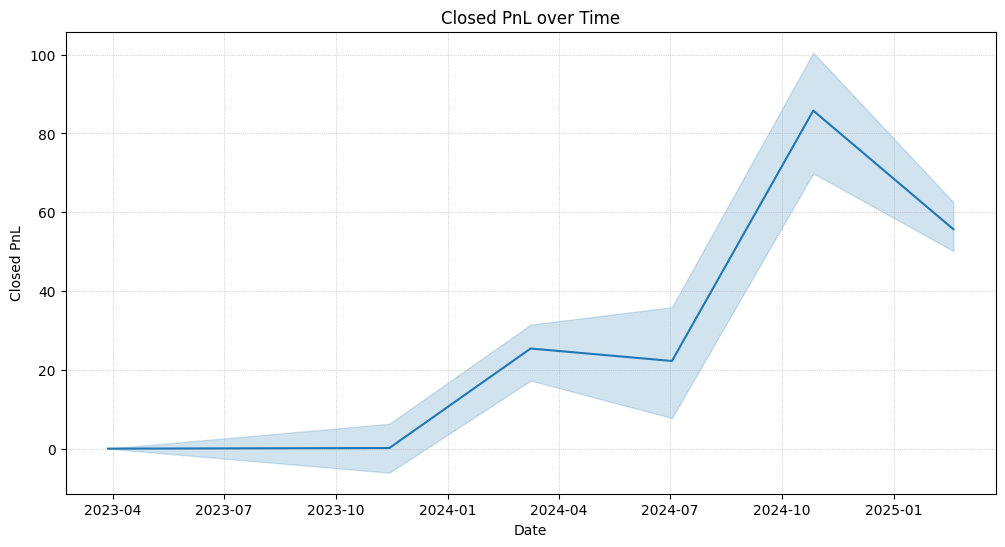

In [46]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.sort_values('date_1'), x='date_1', y='Closed PnL')
plt.title('Closed PnL over Time')
plt.xlabel('Date')
plt.ylabel('Closed PnL')
plt.grid(True, which='both', linestyle=':', linewidth=0.5)

plt.show()



Observation:
It shows that in year 2023 there no much profit  as the time proceeds theres some proft and lost both

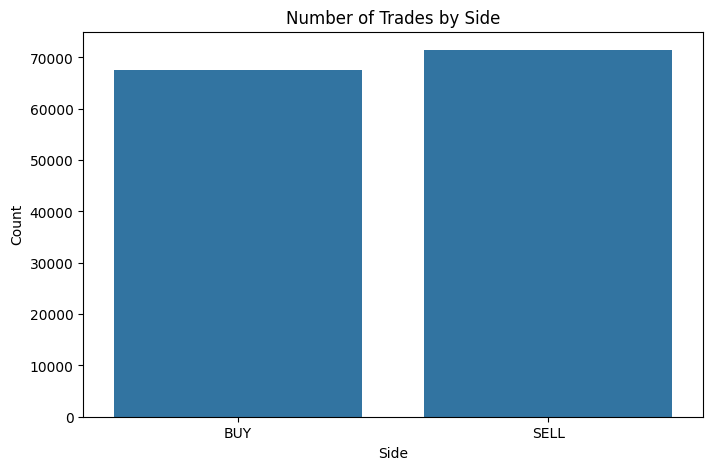

In [44]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Side')
plt.title('Number of Trades by Side')
plt.xlabel('Side')
plt.ylabel('Count')
plt.show()


Insights:
. Most of the people have sold.

**Conclusion:**
1. Most people do trading in fear days.
2. HYPE is the most traded coin.
3. Most people have spent less USD amount.
4. Most of the proft goes up in 2024 mid.